In [1]:
import sympy as sym
import matplotlib.pyplot as plt
%matplotlib inline
sym.init_printing()

# Caracterización de Sistemas en el Dominio del Tiempo


## Respuesta al impulso

A continuación se discutirá sobre la respuesta $y(t)$ de un sistema $\mathcal{H}$, Lineal e Invariante en el Tiempo (LTI), ante una señal de entrada $x(t)$. 

Tenga en cuenta que la señal de entrada puede representarse como una integral:

\begin{equation}
x(t) = \int_{-\infty}^{\infty} x(\tau) \cdot \delta(t-\tau) \; d \tau
\end{equation}

Si se introduce esta representación de la señal de entrada en la transformación que realiza el sistema $\mathcal{H}$ para formar la salida  $y(t) = \mathcal{H} \{ x(t) \}$, se obtiene:


\begin{equation}
y(t) = \mathcal{H} \left\{ \int_{-\infty}^{\infty} x(\tau) \cdot \delta(t-\tau) \; d \tau \right\}
\end{equation}


donde $\mathcal{H} \{ \cdot \}$ representa un operador que encuentra la salida del sistema. Como $x(\tau)$ puede verse como una constante ante la variable $t$, la expresión para $y(t)$ puede escribirse como:


\begin{equation}
y(t) = \int_{-\infty}^{\infty}  x(\tau) \cdot \mathcal{H} \left\{ \delta(t-\tau) \right\} \; d \tau 
\end{equation}

Observe que $\mathcal{H} \{\cdot\}$ opera únicamente sobre el impulso de Dirac.

La respuesta de un sistema ante una señal impulso de Dirac es conocida como la 
[*respuesta al impulso*](https://en.wikipedia.org/wiki/Impulse_response).

\begin{equation}
h(t) = \mathcal{H} \left\{ \delta(t) \right\}
\end{equation}

Si el sistema es invariante en el tiempo, la respuesta a un impulso desplazado es $\mathcal{H} \left\{ \delta(t-\tau) \right\} = h(t-\tau)$. Así, para un sistema LTI se obtiene que:

\begin{equation}
y(t) = \int_{-\infty}^{\infty}  x(\tau) \cdot h(t-\tau) \; d \tau 
\end{equation}


Esta operación es conocida como [*convolución*](https://en.wikipedia.org/wiki/Convolution). Se simboliza mediante $*$, de manera que la integral se represente como $y(t) = x(t) * h(t)$ o, para algunos autores, $y(t) = (x*h)(t)$.

La respuesta $y(t)$ de un sistema LTI \mathcal{H} ante una entrada $x(t)$ se determina completamente a partir de su respuesta impulsional $h(t)$ como la convolución de la entrada $x(t)$ con la respuesta impulsional $h(t)$.


Un sistema LTI con $x(t)$ como entrada y $y(t)$ como salida es descrito mediante la siguiente Ecuación Diferencial Ordinaria (ODE):


\begin{equation}
y(t) + \frac{d}{dt} y(t) = x(t)
\end{equation}

Se desea encontrar la respuesta del sistema ante una entrada $x(t) = e^{- 2 t} \cdot \epsilon(t)$


### Solución A
Primero, se va a resolver la ODE teniendo en cuenta  que deben satisfacerse las condiciones iniciales $y(t)\big\vert_{t = 0-} = 0$ y $\frac{d}{dt}y(t)\big\vert_{t = 0-} = 0$ relacionadas con la causalidad.

a. Defina la ODE en`SymPy`

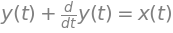

In [2]:
t = sym.symbols('t', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(y + y.diff(t), x)
ode

Se resuelve la ODE para la entrada establecida y considerando que las constantes de integración deben garantiza las condiciones inicales.


In [3]:
xinput = sym.exp(-2*t)*sym.Heaviside(t)

solution = sym.dsolve(ode.subs(x, xinput))
solution

In [4]:

integration_constants = sym.solve(
    (solution.rhs.limit(t, 0, '-'), solution.rhs.diff(t).limit(t, 0, '-')), 'C1')

yA = solution.subs(integration_constants)
yA

Se grafica la señal de salida obtenida al resolver la ODE.

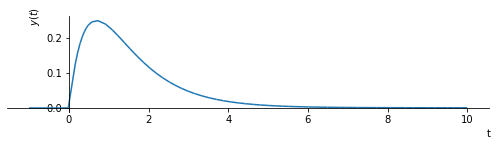

In [5]:
plt.rcParams['figure.figsize'] = 7, 2
sym.plot(yA.rhs, (t,-1,10), ylabel=r'$y(t)$');

### Solución B
Ahora se va a resolver el problema a través de la respuesta impulsional.

La respuesta impulsional $h(t)$ se encuentra al resolver la ODE para una señal impulso de Dirac como entrada, $x(t) = \delta(t)$.

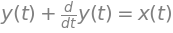

In [6]:
ode

In [7]:
h = sym.Function('h')(t)

solution2 = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, h))

integration_constants = sym.solve((solution2.rhs.limit(
    t, 0, '-'), solution2.rhs.diff(t).limit(t, 0, '-')), 'C1')

h = solution2.subs(integration_constants)
h

La respuesta impulsional se grafica.

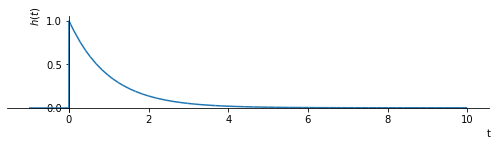

In [8]:
plt.rcParams['figure.figsize'] = 7, 2
sym.plot(h.rhs, (t,-1,10), ylabel=r'$h(t)$');

Ahora se calcula la convolución $y(t) = x(t) * h(t)$ como:

\begin{equation}
y(t) = \int_{-\infty}^{\infty}  x(\tau) \cdot h(t-\tau) \; d \tau 
\end{equation}

Debido a que $h(t)$ y $x(t)$ son señales causales, la expresión de convolución se convierte en:

\begin{equation}
y(t) = \int_{0}^{t} x(\tau) \cdot h(t - \tau) \; d\tau \; \forall t \geq 0
\end{equation}


Observe que $y(t) = 0 \; \forall t<0$.

In [9]:
h

In [10]:
h.rhs

In [11]:
h.lhs

In [12]:
tau = sym.symbols('tau', real=True)

yB = sym.integrate(xinput.subs(t, tau) * h.rhs.subs(t, t-tau), (tau, 0, t))
yB

La señal de salida obtenida mediante el método de convolución se grafica.

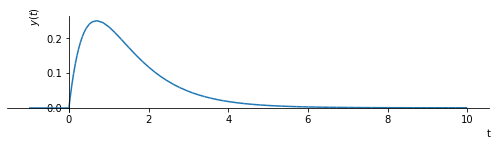

In [13]:
plt.rcParams['figure.figsize'] = 7, 2
sym.plot(yB, (t,-1,10), ylabel=r'$y(t)$');

Las señales obtenidas con los dos métodos deben ser iguales.

In [14]:
yA

In [15]:
yB

Puede observarse que $y_A(t) = y_B(t)$, aunque tengan expresiones diferentes.

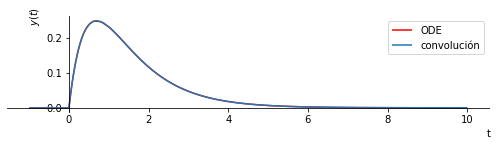

In [16]:
plt.rcParams['figure.figsize'] = 7, 2
graf1 = sym.plot(yA.rhs, (t,-1,10), ylabel=r'$y(t)$', show=False, line_color='red',legend=True, label = 'ODE')
graf2 = sym.plot(yB, (t,-1,10), show=False, legend=True, label = 'convolución')
graf1.extend(graf2)
graf1.show()